In [1]:

import numpy as np
import math
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import pandas as pd

In [ ]:
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_rec_16_data_5.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_rec_16_data_5.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from numpy import loadtxt
from keras.models import load_model


input_layer = Input(shape=(48,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'sensor_concept_nn')
#opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mae', optimizer='adam')
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)


# define the keras model

# Display the model
model.summary()

history_1 = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale), callbacks=[callback])


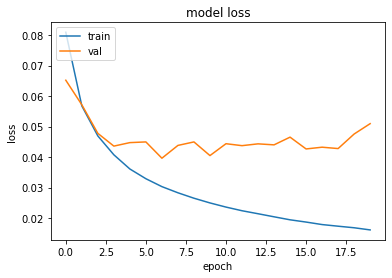

In [7]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.ylim(0.07,0.15)
plt.show()

In [24]:

#Creating a Callback subclass that stores each epoch prediction
class prediction_history(tf.keras.callbacks.Callback):
    def __init__(self):
        self.predhis = []
    def on_epoch_end(self, epoch, logs={}):
        self.predhis.append(model.predict(xval_scale))

#Calling the subclass
predictions=prediction_history()

#Executing the model.fit of the neural network
#model.fit(X=predictor_train, y=target_train, nb_epoch=2, batch_size=batch,validation_split=0.1,callbacks=[predictions]) 
history = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale),callbacks=[predictions])
#Printing the prediction history
#print (predictions.predhis)

Epoch 1/20
1094/1094 [==============================] - 13s 12ms/step - loss: 0.0136 - val_loss: 0.0495
Epoch 2/20
1094/1094 [==============================] - 13s 12ms/step - loss: 0.0133 - val_loss: 0.0564
Epoch 3/20
1094/1094 [==============================] - 12s 11ms/step - loss: 0.0131 - val_loss: 0.0509
Epoch 4/20
1094/1094 [==============================] - 11s 10ms/step - loss: 0.0128 - val_loss: 0.0548
Epoch 5/20
1094/1094 [==============================] - 10s 9ms/step - loss: 0.0126 - val_loss: 0.0535
Epoch 6/20
1094/1094 [==============================] - 12s 11ms/step - loss: 0.0124 - val_loss: 0.0545
Epoch 7/20
1094/1094 [==============================] - 9s 8ms/step - loss: 0.0123 - val_loss: 0.0602
Epoch 8/20
1094/1094 [==============================] - 8s 8ms/step - loss: 0.0121 - val_loss: 0.0563
Epoch 9/20
1094/1094 [==============================] - 9s 8ms/step - loss: 0.0118 - val_loss: 0.0579
Epoch 10/20
1094/1094 [==============================] - 9s 8ms/step - 

In [44]:
check_data=predictions.predhis
np.shape(check_data)
err_sincos_mean=[]

for i in range(0,20):
    err_sincos = (check_data[i][:][2]**2+check_data[i][:][3]**2)-1
    err_sincos_mean.append(np.mean(err_sincos))
print(err_sincos_mean)

[-0.32544735, -0.2958047, -0.33869472, -0.2961124, -0.29005343, -0.25922891, -0.26593688, -0.30103067, -0.2837407, -0.27209377, -0.30167103, -0.33291942, -0.28874782, -0.26999095, -0.30333838, -0.3294926, -0.29723552, -0.26913473, -0.2592358, -0.2626606]


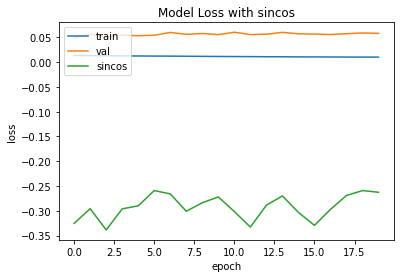

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(err_sincos_mean)
plt.title('Model Loss with sincos')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val','sincos'], loc='upper left')
#plt.ylim(0.07,0.15)
plt.show()

[0.04953996 0.05644463 0.05087417 0.05476918 0.05348438 0.05445293
 0.06015385 0.05632069 0.05793986 0.05575586 0.06055014 0.05584191
 0.05654044 0.06030622 0.05745034 0.05676071 0.05595235 0.05756535
 0.05909814 0.05826667]


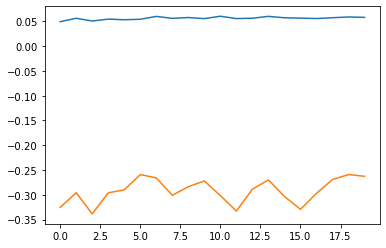

In [46]:
asd = np.array(history.history['val_loss'])
print(asd)

plt.plot(asd)
plt.plot(err_sincos_mean)
plt.show()

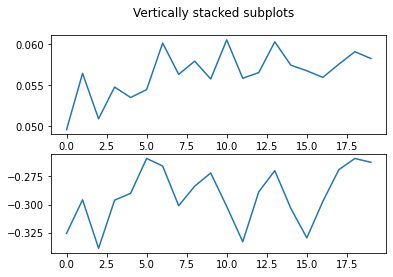

In [47]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(asd)
axs[1].plot(err_sincos_mean)

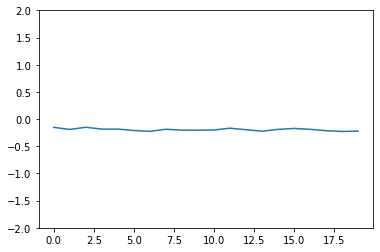

-0.19481419053569243


In [54]:
plt.plot(asd/err_sincos_mean)
plt.ylim(-2,2)
plt.show()
print(np.mean(asd/err_sincos_mean))

### err_sincos_mean is sin**2(beta)+cos**2(beat)-1
### asd is validation loss of the model

# asd = constant * err_sincos_mean

### the constant in this case is -0.2 
